In [39]:
!pip install GeoPandas

In [40]:

%matplotlib inline

import pandas as pd
import geopandas

In [41]:
!pip install contextily

In [42]:

import contextily as ctx
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1

In [44]:
Parchi_regionali = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon/Parchi_regionali_e_nazionali_polygon.dbf")
Parchi_regionali

FID  ...                                           geometry
0     5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1     6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2     7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3     8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4     1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...
5     2  ...  POLYGON ((611429.112 5154022.734, 612080.475 5...
6     3  ...  POLYGON ((584084.298 5161019.100, 584083.048 5...
7     4  ...  POLYGON ((617719.939 5125721.072, 617744.313 5...
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
10   11  ...  POLYGON ((503128.548 5073530.075, 503147.548 5...
11   10  ...  POLYGON ((530035.026 5077348.997, 530099.399 5...
12   20  ...  POLYGON ((566862.701 5044980.915, 566850.701 5...
13   16  ...  POLYGON ((551172.408 5063194.271, 551171.818 5...
14   17  ...  POLYGON ((530460.139 5059979.758, 530448.139 5...
15   12  ...  POLYGON ((519023.300 5071249.811, 519020.695 5...
16   13  ...  POLYGON ((508880.762 5069982.391, 508899.778 5...
17   14  ...  POLYGON ((492571.508 5069463.220, 492567.133 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
19   18  ...  POLYGON ((557596.061 5048270.880, 557609.061 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
23   24  ...  POLYGON ((632059.361 5023580.221, 631992.362 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...
25   26  ...  POLYGON ((597132.825 5006159.060, 597136.825 5...

[26 rows x 11 columns]

In [45]:
 parchi = Parchi_regionali[Parchi_regionali['NOME'].str.contains('Milano')]
 parchi

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...

[3 rows x 11 columns]

In [46]:
# parchi = Parchi_regionali[Parchi_regionali['NOME'].str.contains('Milano')]
#mio metodo ma se nel nome non contiene il nome del posto non va

In [47]:
comuni_ita = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf")
comuni_ita

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

In [48]:
 comuni = comuni_ita[comuni_ita.COMUNE == 'Milano']
 comuni

COD_RIP  ...                                           geometry
1882        1  ...  POLYGON ((513714.538 5042508.056, 513985.199 5...

[1 rows x 13 columns]

In [49]:
parchiMilano = parchi[parchi.intersects(comuni.geometry.squeeze())]
parchiMilano

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

In [50]:
ComuniParchi= comuni_ita[comuni_ita.intersects(parchiMilano.unary_union)]
ComuniParchi

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1817        1  ...  POLYGON ((499326.672 5038880.244, 499885.260 5...
...       ...  ...                                                ...
7465        1  ...  POLYGON ((534210.409 5035224.602, 534551.968 5...
7484        1  ...  POLYGON ((534698.954 5033625.792, 534731.476 5...
7486        1  ...  POLYGON ((530678.622 5027337.660, 530960.619 5...
7500        1  ...  POLYGON ((529834.629 5021137.707, 530206.624 5...
7506        1  ...  POLYGON ((534164.595 5029853.641, 534184.596 5...

[88 rows x 13 columns]

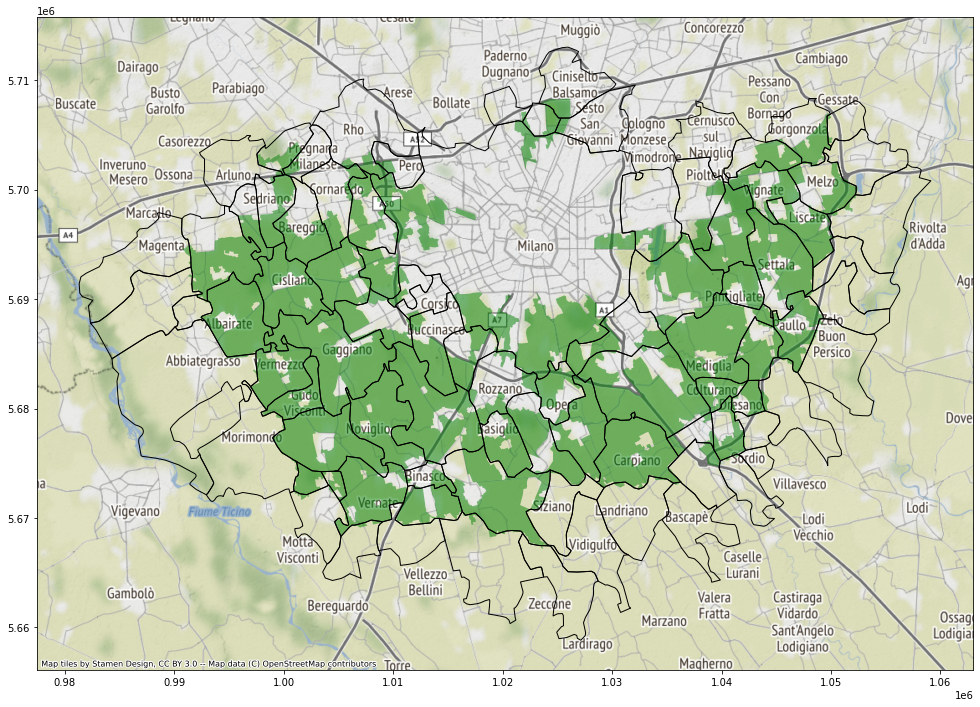

In [51]:
ax = parchi.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='green', alpha=0.5)
ComuniParchi.to_crs(epsg=3857).plot(ax=ax, facecolor='None', edgecolor='k')
ctx.add_basemap(ax)

# 2 prova

In [52]:
comuniConfinanti = comuni_ita[comuni_ita.touches(comuni.geometry.squeeze())]
comuniConfinanti

COD_RIP  ...                                           geometry
1814        1  ...  POLYGON ((506416.116 5045124.529, 506782.458 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1825        1  ...  POLYGON ((508068.588 5045562.067, 508068.588 5...
1826        1  ...  POLYGON ((514613.122 5043643.623, 515033.668 5...
1828        1  ...  POLYGON ((509908.110 5030714.300, 510291.086 5...
1846        1  ...  POLYGON ((506991.974 5033297.204, 507033.799 5...
1850        1  ...  POLYGON ((521178.812 5044037.362, 521198.630 5...
1853        1  ...  POLYGON ((513324.450 5044373.750, 513413.918 5...
1855        1  ...  POLYGON ((508715.786 5032711.622, 508754.073 5...
1857        1  ...  POLYGON ((502905.966 5034740.413, 503349.392 5...
1887        1  ...  POLYGON ((511193.960 5043607.177, 511523.463 5...
1889        1  ...  POLYGON ((516130.826 5026580.285, 516145.949 5...
1896        1  ...  POLYGON ((504478.722 5041155.559, 504694.690 5...
1897        1  ...  POLYGON ((524640.471 5035256.833, 525021.665 5...
1906        1  ...  POLYGON ((503759.558 5045021.657, 503804.708 5...
1911        1  ...  POLYGON ((512863.590 5027792.280, 513364.365 5...
1913        1  ...  POLYGON ((521244.693 5030939.635, 521404.692 5...
1920        1  ...  POLYGON ((523352.676 5039565.571, 523621.892 5...
1922        1  ...  POLYGON ((520995.577 5044504.342, 520968.724 5...
1924        1  ...  POLYGON ((504240.586 5038799.829, 504418.755 5...
1927        1  ...  POLYGON ((504393.783 5031617.351, 505429.872 5...
1936        1  ...  POLYGON ((523695.531 5041429.575, 523351.165 5...
1942        1  ...  POLYGON ((509363.172 5042554.492, 509538.293 5...

[23 rows x 13 columns]

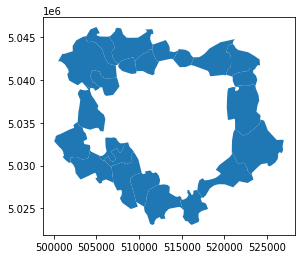

In [53]:
comuniConfinanti = comuni_ita[comuni_ita.touches(comuni.geometry.squeeze())]
comuniConfinanti.plot()

# 32. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

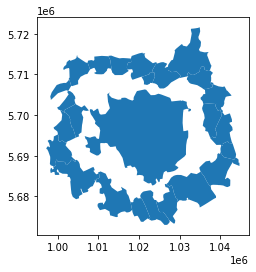

In [54]:
comuniConfinanti2 = comuni_ita[comuni_ita.touches(comuniConfinanti.unary_union)]
ax = comuniConfinanti2.to_crs(epsg=3857).plot()

# 3 comuni confinanti a milano più grande

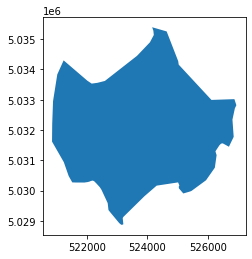

In [55]:
ComunePiuEsteso = comuniConfinanti[comuniConfinanti.Shape_Area ==comuniConfinanti.Shape_Area.max()]
ComunePiuEsteso.plot()

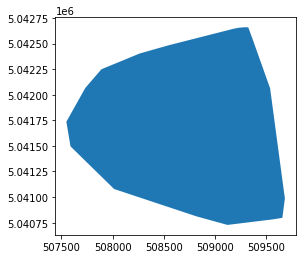

In [56]:
ComunemenoEsteso = comuniConfinanti[comuniConfinanti.Shape_Area ==comuniConfinanti.Shape_Area.min()]
ComunemenoEsteso.plot()

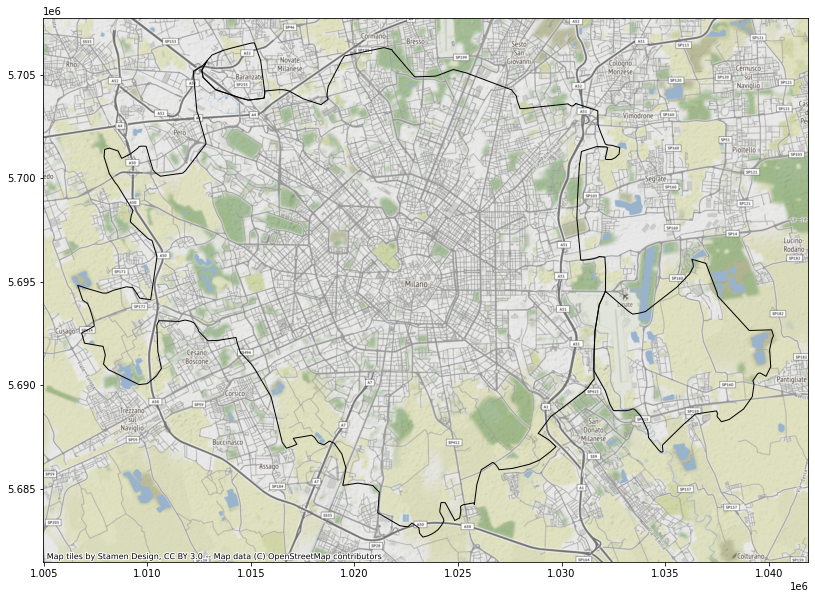

In [57]:
ax = comuni.to_crs(epsg=3857).plot(facecolor='None', edgecolor='k', figsize=(20,10))
ComunemenoEsteso.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k',ax=ax)
ComunePiuEsteso.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k',ax=ax)
ctx.add_basemap(ax)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

In [58]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
Quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [59]:
ParchiMilano = Quartieri[Quartieri.intersects(parchi.to_crs(epsg=4326).unary_union)]
ParchiMilano

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
9       61  ...  POLYGON ((9.11143 45.47640, 9.11193 45.47624, ...
10      60  ...  POLYGON ((9.13020 45.48464, 9.13075 45.48449, ...
11      62  ...  POLYGON ((9.08375 45.48485, 9.08444 45.48459, ...
20      83  ...  POLYGON ((9.17808 45.53479, 9.17807 45.53439, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
26      46  ...  POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
30      14  ...  POLYGON ((9.21337 45.52948, 9.21337 45.52948, ...
31      32  ...  POLYGON ((9.26378 45.43251, 9.26384 45.43248, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
38      38  ...  POLYGON ((9.20060 45.43608, 9.20429 45.43642, ...
41      35  ...  POLYGON ((9.23480 45.44588, 9.23480 45.44569, ...
42      54  ...  POLYGON ((9.07736 45.45589, 9.07671 45.45364, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
47      65  ...  POLYGON ((9.09884 45.50652, 9.09884 45.50651, ...
50      41  ...  POLYGON ((9.17334 45.42346, 9.17402 45.42205, ...
52      56  ...  POLYGON ((9.12613 45.46928, 9.12638 45.46851, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...
59      42  ...  POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...
61      36  ...  POLYGON ((9.21561 45.43849, 9.21685 45.43686, ...
65      55  ...  POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...
66      24  ...  POLYGON ((9.26017 45.47147, 9.26018 45.47143, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[29 rows x 9 columns]

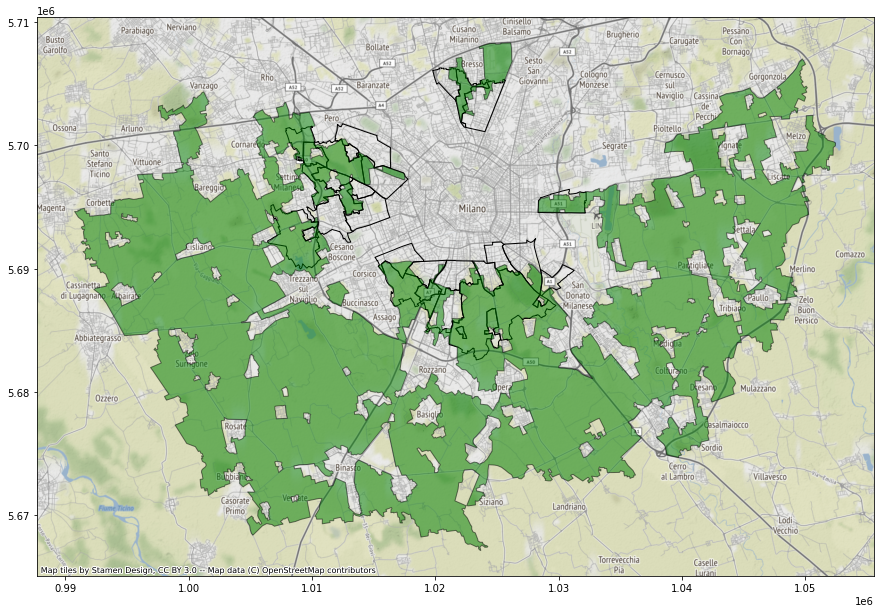

In [60]:
ax = ParchiMilano.to_crs(epsg=3857).plot(facecolor='none',figsize=(15,15),edgecolor='k')
parchi.to_crs(epsg=3857).plot(ax=ax,facecolor='green',edgecolor='k',alpha=0.5)
ctx.add_basemap(ax)

# 3  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

Parco Nord Milano


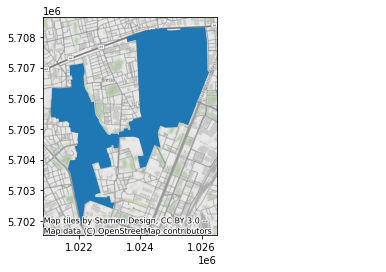

In [61]:
parco = input()
ax = Parchi_regionali[Parchi_regionali['NOME'].str.contains(parco)].to_crs(epsg = 3857).plot()
comuniUtenti = comuni[comuni.intersects(Parchi_regionali[Parchi_regionali['NOME'] == parco].geometry.squeeze())]

ctx.add_basemap(ax)

# 4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

In [105]:
Province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf')
Province

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [106]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf")
lombardia = regioni[regioni.DEN_REG == "Lombardia"]
provinceLombardia = Province[Province.within(lombardia.geometry.squeeze())]
comuniLombardia = comuni[comuni.within(lombardia.geometry.squeeze())]

Parco Nord Milano


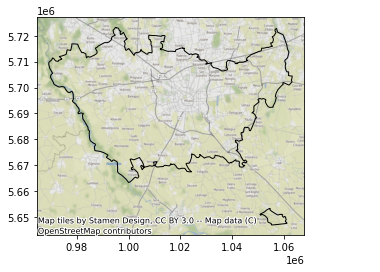

In [107]:
parco = input()
comuniUtenti = Province[Province.intersects(Parchi_regionali[Parchi_regionali.NOME == parco].geometry.squeeze())]
ax = comuniUtenti.to_crs(epsg=3857).plot(facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

# 5. dato un comune, avere i parchi che ospita (elenco e mappa)

Milano


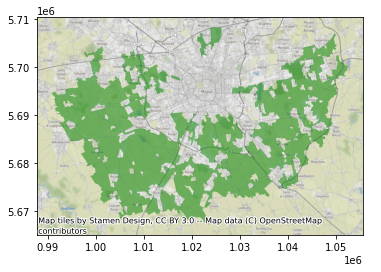

In [130]:
comuneInput = input()
if comuneInput not in comuniLombardia.COMUNE.tolist():
  print("Non è in Lombardia")
else:
  ParchiUtenti = Parchi_regionali[Parchi_regionali.intersects(comuni_ita[comuni_ita.COMUNE == comuneInput].geometry.squeeze())]
  ax = ParchiUtenti.to_crs(epsg=3857).plot(facecolor='green',alpha = 0.5)
  ctx.add_basemap(ax)

# 6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

In [132]:
ProviceInput = input()
if ProviceInput not in provinceLombardia.DEN_UTS.tolist():
  print("Non è in Lombardia")
else:
  ProvUtenti = Parchi_regionali[Parchi_regionali.intersects(Province[Province.DEN_UTS == ProviceInput].geometry.squeeze())]
  ax = ProvUtenti.to_crs(epsg=3857).plot(facecolor='green',alpha = 0.5)
  Province[Province.DEN_UTS == ProviceInput].to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
  ctx.add_basemap(ax)

Novara
Non è in Lombardia
